In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Loading data
data = Path("Data/clean_data.csv")
data_df = pd.read_csv(data)
data_df.head()

,id,screen_name,default_profile,description,created_at,geo_enabled,lang,statuses_count,followers_count,favourites_count,verified,account_type
0,16282004,eckates,1,My name is Enrique! ! I'm a highly experienced...,2008-09-14 13:20:09,0,en,11405,819,0,0,1
1,16740486,genebailey,0,"Author, Speaker, Father, Friend, Motivator, Re...",2008-10-14 18:11:24,1,en,520,219,36,0,1
2,17132768,patrickghoward,0,Patrick G Howard is an experienced project & p...,2008-11-03 16:51:00,0,en,4671,38877,6,0,1
3,18013384,DoggieCakes,0,Dog Bakery and Boutique - Retail (Events and O...,2008-12-10 06:44:57,1,en,8512,2069,70,0,1
4,21331733,DavidVarrone,0,Home Based Business and Personal Development C...,2009-02-19 20:46:02,0,en,245,6656,1,0,1


In [3]:
data_df.dtypes

id                   int64
screen_name         object
default_profile      int64
description         object
created_at          object
geo_enabled          int64
lang                object
statuses_count       int64
followers_count      int64
favourites_count     int64
verified             int64
account_type         int64
dtype: object

In [4]:
# Define features set
X = data_df.copy()
X.drop("account_type", axis=1, inplace=True)
X.head()

,id,screen_name,default_profile,description,created_at,geo_enabled,lang,statuses_count,followers_count,favourites_count,verified
0,16282004,eckates,1,My name is Enrique! ! I'm a highly experienced...,2008-09-14 13:20:09,0,en,11405,819,0,0
1,16740486,genebailey,0,"Author, Speaker, Father, Friend, Motivator, Re...",2008-10-14 18:11:24,1,en,520,219,36,0
2,17132768,patrickghoward,0,Patrick G Howard is an experienced project & p...,2008-11-03 16:51:00,0,en,4671,38877,6,0
3,18013384,DoggieCakes,0,Dog Bakery and Boutique - Retail (Events and O...,2008-12-10 06:44:57,1,en,8512,2069,70,0
4,21331733,DavidVarrone,0,Home Based Business and Personal Development C...,2009-02-19 20:46:02,0,en,245,6656,1,0


In [5]:
# Define target vector
y = data_df["account_type"].values.reshape(-1, 1)
y[:5]


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [6]:
#drop the non-numerical columns
X = X.drop(columns=['screen_name', 'description', 'created_at', 'lang'])


In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [10]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5078,271
Actual 1,615,1522


Accuracy Score : 0.8816457387122629
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5349
           1       0.85      0.71      0.77      2137

    accuracy                           0.88      7486
   macro avg       0.87      0.83      0.85      7486
weighted avg       0.88      0.88      0.88      7486



In [16]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.31495218099835787, 'favourites_count'),
 (0.28230005862742147, 'followers_count'),
 (0.22887952514413842, 'statuses_count'),
 (0.06576057936858277, 'id'),
 (0.04884690646366215, 'geo_enabled'),
 (0.04381405258099685, 'verified'),
 (0.015446696816840392, 'default_profile')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

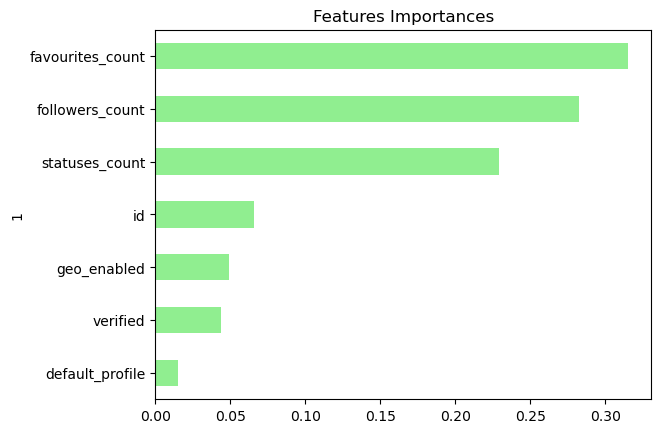

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)